In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd
import streamlit as st

C:\Users\muadz\anaconda3\envs\tensorflow_env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
base_dir = "Lego/"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [3]:
# colors_df = pd.read_csv("colors.csv")
parts_df = pd.read_csv("parts.csv")
# sets_df = pd.read_csv("sets.csv") 
# inventories_df = pd.read_csv("inventories.csv")
# inventory_parts_df = pd.read_csv("inventory_parts.csv")


In [4]:
parts_df = parts_df.drop_duplicates()
parts_df = parts_df[
    parts_df["part_num"].notna() &
    parts_df["name"].notna()
]
parts_df["part_num"] = parts_df["part_num"].astype(str)
lego_parts = parts_df[["part_num", "name"]]

In [5]:
# lego_parts

In [6]:
train_1  = len(os.listdir(os.path.join(train_dir, '2357 Brick corner 1x2x2')))
train_2  = len(os.listdir(os.path.join(train_dir, '2420 plate corner 2x2')))
train_3  = len(os.listdir(os.path.join(train_dir, '2780 Peg with friction')))
train_4  = len(os.listdir(os.path.join(train_dir, '3001 brick 2x4')))
train_5  = len(os.listdir(os.path.join(train_dir, '3002 brick 2x3')))
train_6  = len(os.listdir(os.path.join(train_dir, '3003 Brick 2x2')))
train_7  = len(os.listdir(os.path.join(train_dir, '3004 Brick 1x2')))
train_8  = len(os.listdir(os.path.join(train_dir, '3005 Brick 1x1')))
train_9  = len(os.listdir(os.path.join(train_dir, '3010 brick 1x4')))
train_10 = len(os.listdir(os.path.join(train_dir, '3020 plate 2x4')))
train_11 = len(os.listdir(os.path.join(train_dir, '3021 plate 2x3')))
train_12 = len(os.listdir(os.path.join(train_dir, '3022 Plate 2x2')))
train_13 = len(os.listdir(os.path.join(train_dir, '3023 Plate 1x2')))
train_14 = len(os.listdir(os.path.join(train_dir, '3024 Plate 1x1')))
train_15 = len(os.listdir(os.path.join(train_dir, '3037 roof tile 1x4')))
train_16 = len(os.listdir(os.path.join(train_dir, '3038 roof tile 2x3')))
train_17 = len(os.listdir(os.path.join(train_dir, '3039 roof tile 2x2')))
train_18 = len(os.listdir(os.path.join(train_dir, '3040 Roof Tile 1x2x45deg')))
train_19 = len(os.listdir(os.path.join(train_dir, '3045 roof corner outside tile 2x2')))
train_20 = len(os.listdir(os.path.join(train_dir, '3046 roof corner inside tile 2x2')))
train_21 = len(os.listdir(os.path.join(train_dir, '3062 Round Brick 1x1')))
train_22 = len(os.listdir(os.path.join(train_dir, '3063 Curved Brick 2 Knobs')))
train_23 = len(os.listdir(os.path.join(train_dir, '3068 flat tile 2x2')))
train_24 = len(os.listdir(os.path.join(train_dir, '3069 Flat Tile 1x2')))
train_25 = len(os.listdir(os.path.join(train_dir, '3070 Flat Tile 1x1')))
train_26 = len(os.listdir(os.path.join(train_dir, '3298 roof tile 2x3')))
train_27 = len(os.listdir(os.path.join(train_dir, '33909 plate 2 knobs 2x2')))
train_28 = len(os.listdir(os.path.join(train_dir, '3622 brick 1x3')))
train_29 = len(os.listdir(os.path.join(train_dir, '3623 Plate 1x3')))
train_30 = len(os.listdir(os.path.join(train_dir, '3659 brick bow 1x4')))
train_31 = len(os.listdir(os.path.join(train_dir, '3675 roof tile outside 3x3')))
train_32 = len(os.listdir(os.path.join(train_dir, '3700 Technic Brick 1x2')))
train_33 = len(os.listdir(os.path.join(train_dir, '3794 Plate 1X2 with 1 Knob')))
train_34 = len(os.listdir(os.path.join(train_dir, '4150 flat tile round 2x2')))
train_35 = len(os.listdir(os.path.join(train_dir, '4274 Connector Peg w Knob')))
train_36 = len(os.listdir(os.path.join(train_dir, '4286 roof tile 1x3')))
train_37 = len(os.listdir(os.path.join(train_dir, '43857 beam 1x2')))
train_38 = len(os.listdir(os.path.join(train_dir, '4490 brick bow 1x3')))
train_39 = len(os.listdir(os.path.join(train_dir, '6143 Brick D16 w cross')))
train_40 = len(os.listdir(os.path.join(train_dir, '6632 Technic Lever 3M')))
train_41 = len(os.listdir(os.path.join(train_dir, '14719 flat tile corner 2x2')))
train_42 = len(os.listdir(os.path.join(train_dir, '15672 roof tile 1x2')))
train_43 = len(os.listdir(os.path.join(train_dir, '18654 beam 1M')))
train_44 = len(os.listdir(os.path.join(train_dir, '27925 flat tile round 2x2')))
train_45 = len(os.listdir(os.path.join(train_dir, '41677 lever 2M')))
train_46 = len(os.listdir(os.path.join(train_dir, '41678 Cross Block Fork 2x2')))
train_47 = len(os.listdir(os.path.join(train_dir, '43093 Bush 2M friction - Cross axle')))
train_48 = len(os.listdir(os.path.join(train_dir, '54200 roof tile 1x1')))
train_49 = len(os.listdir(os.path.join(train_dir, '85984 roof tile 1x2')))
train_50 = len(os.listdir(os.path.join(train_dir, '99301 roof tile inside 3x3')))

total_training_images = sum([
    train_1, train_2, train_3, train_4, train_5, train_6, train_7, train_8, train_9, train_10,
    train_11, train_12, train_13, train_14, train_15, train_16, train_17, train_18, train_19, train_20,
    train_21, train_22, train_23, train_24, train_25, train_26, train_27, train_28, train_29, train_30,
    train_31, train_32, train_33, train_34, train_35, train_36, train_37, train_38, train_39, train_40,
    train_41, train_42, train_43, train_44, train_45, train_46, train_47, train_48, train_49, train_50
])


print(f"Total training images: {total_training_images}")

Total training images: 40000


In [7]:
val_1 = len(os.listdir(os.path.join(validation_dir, '2357 Brick corner 1x2x2')))
val_2 = len(os.listdir(os.path.join(validation_dir, '3003 Brick 2x2')))
val_3 = len(os.listdir(os.path.join(validation_dir, '3004 Brick 1x2')))
val_4 = len(os.listdir(os.path.join(validation_dir, '3005 Brick 1x1')))
val_5 = len(os.listdir(os.path.join(validation_dir, '3022 Plate 2x2')))
val_6 = len(os.listdir(os.path.join(validation_dir, '3023 Plate 1x2')))
val_7 = len(os.listdir(os.path.join(validation_dir, '3024 Plate 1x1')))
val_8 = len(os.listdir(os.path.join(validation_dir, '3040 Roof Tile 1x2x45deg')))
val_9 = len(os.listdir(os.path.join(validation_dir, '3069 Flat Tile 1x2')))
val_10 = len(os.listdir(os.path.join(validation_dir, '3673 Peg 2M')))
val_11 = len(os.listdir(os.path.join(validation_dir, '3713 Bush for Cross Axle')))
val_12 = len(os.listdir(os.path.join(validation_dir, '3794 Plate 1X2 with 1 Knob')))
val_13 = len(os.listdir(os.path.join(validation_dir, '6632 Technic Lever 3M')))
val_14 = len(os.listdir(os.path.join(validation_dir, '11214 Bush 3M friction with Cross axle')))
val_15 = len(os.listdir(os.path.join(validation_dir, '18651 Cross Axle 2M with Snap friction')))
val_16 = len(os.listdir(os.path.join(validation_dir, '32123 half Bush')))

total_validation_images = sum([
    val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10,val_11,val_12,val_13,val_14,val_15,val_16
    
])
print(f"Total validation images: {total_validation_images}")

Total validation images: 6380


In [8]:
train_data = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2, 
    horizontal_flip = True
)
val_data = ImageDataGenerator(
    rescale = 1 / 255
)
target_size = (150, 150)

train_generator = train_data.flow_from_directory(
    train_dir,
    target_size = target_size,
    batch_size = 32,
    class_mode = 'binary'
) 
val_generator = val_data.flow_from_directory(
    validation_dir,
    target_size = target_size,
    batch_size = 32,
    class_mode = 'binary'
)
train_generator.class_indices

Found 40000 images belonging to 50 classes.
Found 6380 images belonging to 16 classes.


{'14719 flat tile corner 2x2': 0,
 '15672 roof tile 1x2': 1,
 '18654 beam 1M': 2,
 '2357 Brick corner 1x2x2': 3,
 '2420 plate corner 2x2': 4,
 '2780 Peg with friction': 5,
 '27925 flat tile round 2x2': 6,
 '3001 brick 2x4': 7,
 '3002 brick 2x3': 8,
 '3003 Brick 2x2': 9,
 '3004 Brick 1x2': 10,
 '3005 Brick 1x1': 11,
 '3010 brick 1x4': 12,
 '3020 plate 2x4': 13,
 '3021 plate 2x3': 14,
 '3022 Plate 2x2': 15,
 '3023 Plate 1x2': 16,
 '3024 Plate 1x1': 17,
 '3037 roof tile 1x4': 18,
 '3038 roof tile 2x3': 19,
 '3039 roof tile 2x2': 20,
 '3040 Roof Tile 1x2x45deg': 21,
 '3045 roof corner outside tile 2x2': 22,
 '3046 roof corner inside tile 2x2': 23,
 '3062 Round Brick 1x1': 24,
 '3063 Curved Brick 2 Knobs': 25,
 '3068 flat tile 2x2': 26,
 '3069 Flat Tile 1x2': 27,
 '3070 Flat Tile 1x1': 28,
 '3298 roof tile 2x3': 29,
 '33909 plate 2 knobs 2x2': 30,
 '3622 brick 1x3': 31,
 '3623 Plate 1x3': 32,
 '3659 brick bow 1x4': 33,
 '3675 roof tile outside 3x3': 34,
 '3700 Technic Brick 1x2': 35,
 '3794

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(
    filters = 32,
    kernel_size = 32,
    activation = 'relu',
    input_shape = (150, 150, 3)
))

C:\Users\muadz\anaconda3\envs\tensorflow_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(MaxPooling2D(
    pool_size = (2,2)
))

In [12]:
model.add(Conv2D(
    filters = 48,
    kernel_size = 48,
    activation = 'relu',
    input_shape = (150, 150, 3)
))

In [13]:
model.add(MaxPooling2D(
    pool_size = (2,2)
))

In [14]:
model.add(Conv2D(
    filters = 128,
    kernel_size = (3, 3),
    activation = 'relu',
    input_shape = (150, 150, 3)
))

In [15]:
model.add(MaxPooling2D(
    pool_size = (2,2)
))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dropout(0.5))

In [18]:
model.add(Dense(
    units=32 # add 64 neurons
))

In [19]:
model.add(Dense(
    units=1,
    activation='sigmoid'
))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 119, 119, 32)        │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 59, 59, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 48)          │       3,538,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          55,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,709,201 (14.15 MB)

 Trainable params: 3,709,201 (14.15 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [22]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

In [23]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[early_stopping])

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1924s 2s/step - accuracy: 0.0200 - loss: -61600877680525312.0000 - val_accuracy: 0.0627 - val_loss: -138445607906836480.0000
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1876s 2s/step - accuracy: 0.0200 - loss: -2911059289118343168.0000 - val_accuracy: 0.0627 - val_loss: -3048613966189166592.0000
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1840s 1s/step - accuracy: 0.0200 - loss: -21633260712399732736.0000 - val_accuracy: 0.0627 - val_loss: -16053130349785382912.0000
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1864s 1s/step - accuracy: 0.0200 - loss: -80119019778735079424.0000 - val_accuracy: 0.0627 - val_loss: -49887318652382871552.0000
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1893s 2s/step - accuracy: 0.0200 - loss: -209890577292950765568.0000 - val_accuracy: 0.0627 - val_loss: -117958923554878652416.0000
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1875s 2s/step - accuracy: 0.0200 - loss: -449703070510151106560.0000 - val_accuracy: 0.0627 - val_loss:

In [24]:
saved_model = model.save('lego_parts_identifier.keras')

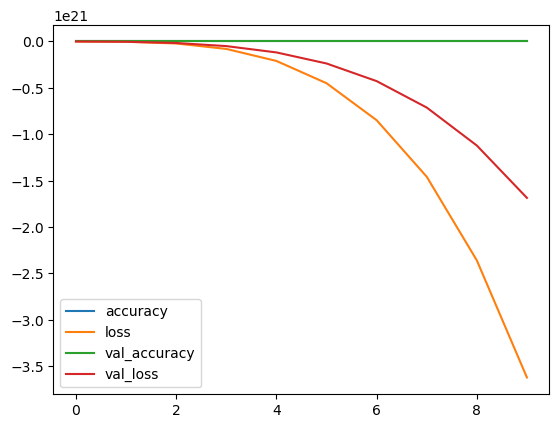

In [25]:
pd.DataFrame(history.history).plot()
plt.show()